In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
data =pd.read_excel('C:/Users/bran/Desktop/hist/saat.xlsx','Hoja1')
y = data

In [4]:
y.head()

,ds,y
0,2016-01-01 00:00:00,2
1,2016-01-01 01:00:00,1
2,2016-01-01 02:00:00,1
3,2016-01-01 03:00:00,2
4,2016-01-01 04:00:00,1


In [5]:
y.ds = pd.to_datetime(y.ds)
y.index = y.ds 
y = y['y'].resample('MS').mean()

In [6]:
print(y)

ds
2016-01-01    3.588710
2016-02-01    3.840517
2016-03-01    3.932796
2016-04-01    4.058333
2016-05-01    3.787634
2016-06-01    3.829167
2016-07-01    3.512097
2016-08-01    3.377688
2016-09-01    3.733333
2016-10-01    3.552419
2016-11-01    3.836111
2016-12-01    3.845430
2017-01-01    3.548387
2017-02-01    4.150298
2017-03-01    4.192204
2017-04-01    3.922222
2017-05-01    3.653226
2017-06-01    3.625000
2017-07-01    3.357527
2017-08-01    3.401882
2017-09-01    3.393056
2017-10-01    3.393817
2017-11-01    3.418056
2017-12-01    3.307796
2018-01-01    3.122312
Freq: MS, Name: y, dtype: float64


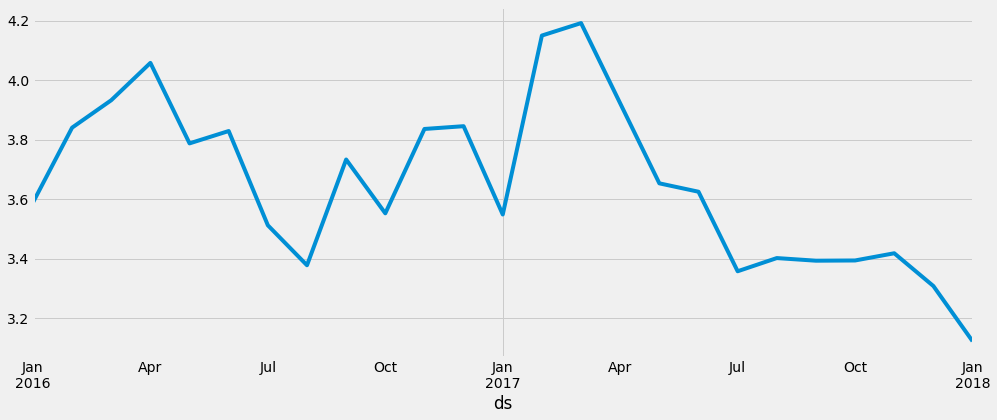

In [7]:
y.plot(figsize=(15, 6))
plt.show()

In [8]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=(1, 0, 0),
                                            seasonal_order=(0, 0, 0, 0),
                                            mle_regression=True, 
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:0.716041460569472
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:0.716041460569472
ARIMA(0, 1

In [10]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 1), # un año
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2587      0.241      1.073      0.283      -0.214       0.731
ma.L1         -0.8292      0.247     -3.352      0.001      -1.314      -0.344
ar.S.L1        0.2587      0.241      1.073      0.283      -0.214       0.731
ma.S.L1       -0.8292      0.247     -3.352      0.001      -1.314      -0.344
sigma2         0.0522      0.020      2.643      0.008       0.013       0.091


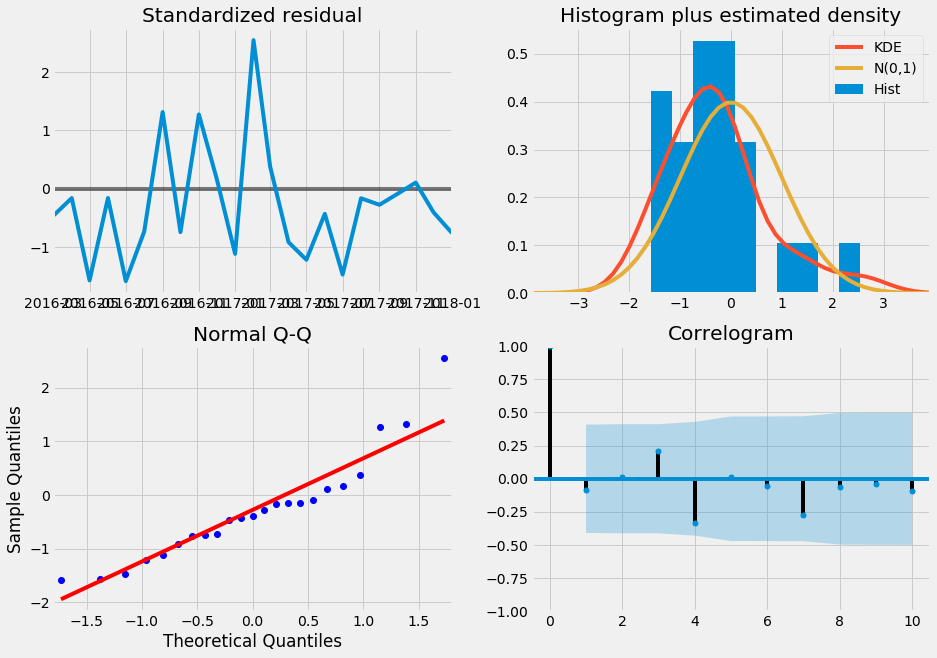

In [11]:
results.plot_diagnostics(figsize=(14, 10))
plt.show()

In [12]:
pred = results.get_prediction(start=pd.to_datetime('2017-08-01'), dynamic=False)
pred_ci = pred.conf_int()

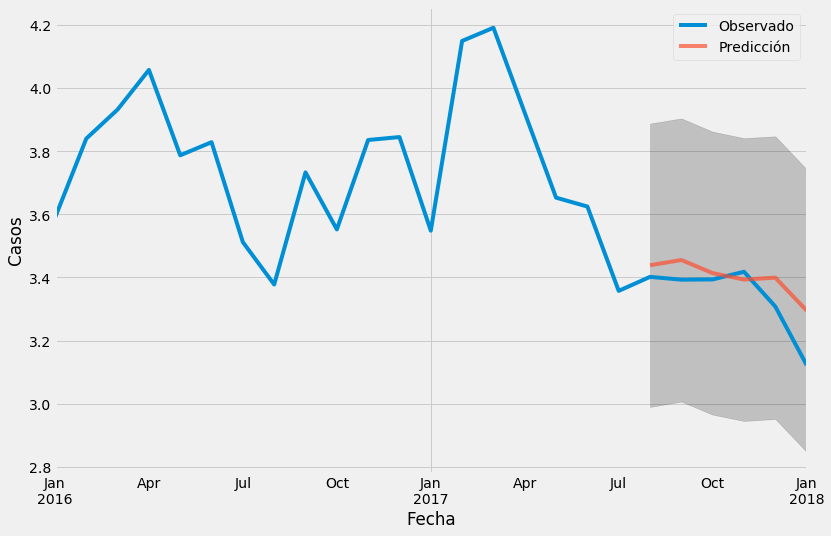

In [15]:
ax = y['2016':].plot(label='Observado',figsize=(12, 8))
pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-08-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [17]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-08-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

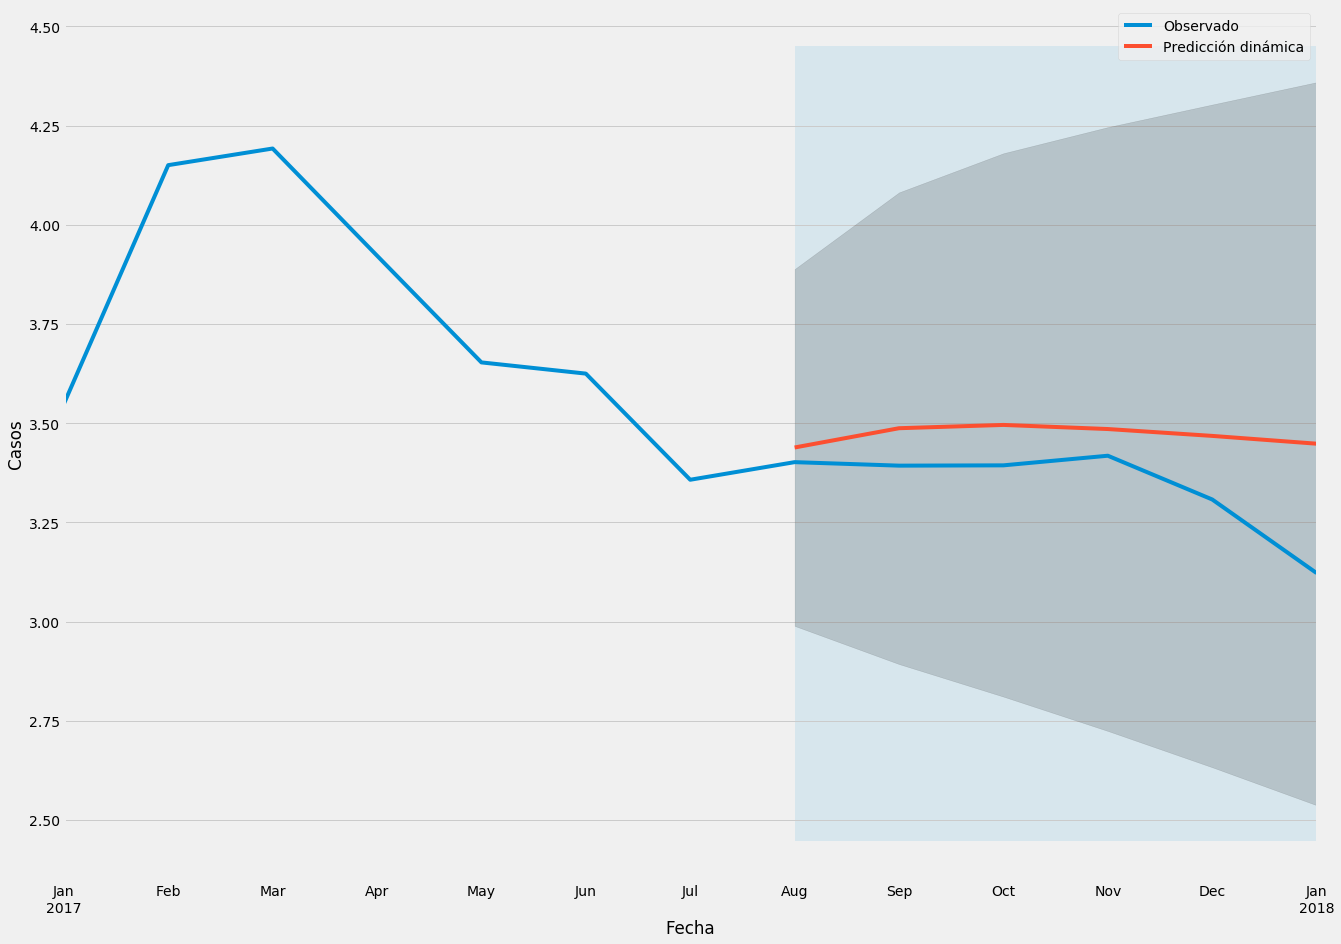

In [18]:
ax = y['2017-01-01':].plot(label='Observado', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Predicción dinámica', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.15)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-08-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')

plt.legend()
plt.show()

In [19]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-08-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.03


In [23]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=11)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

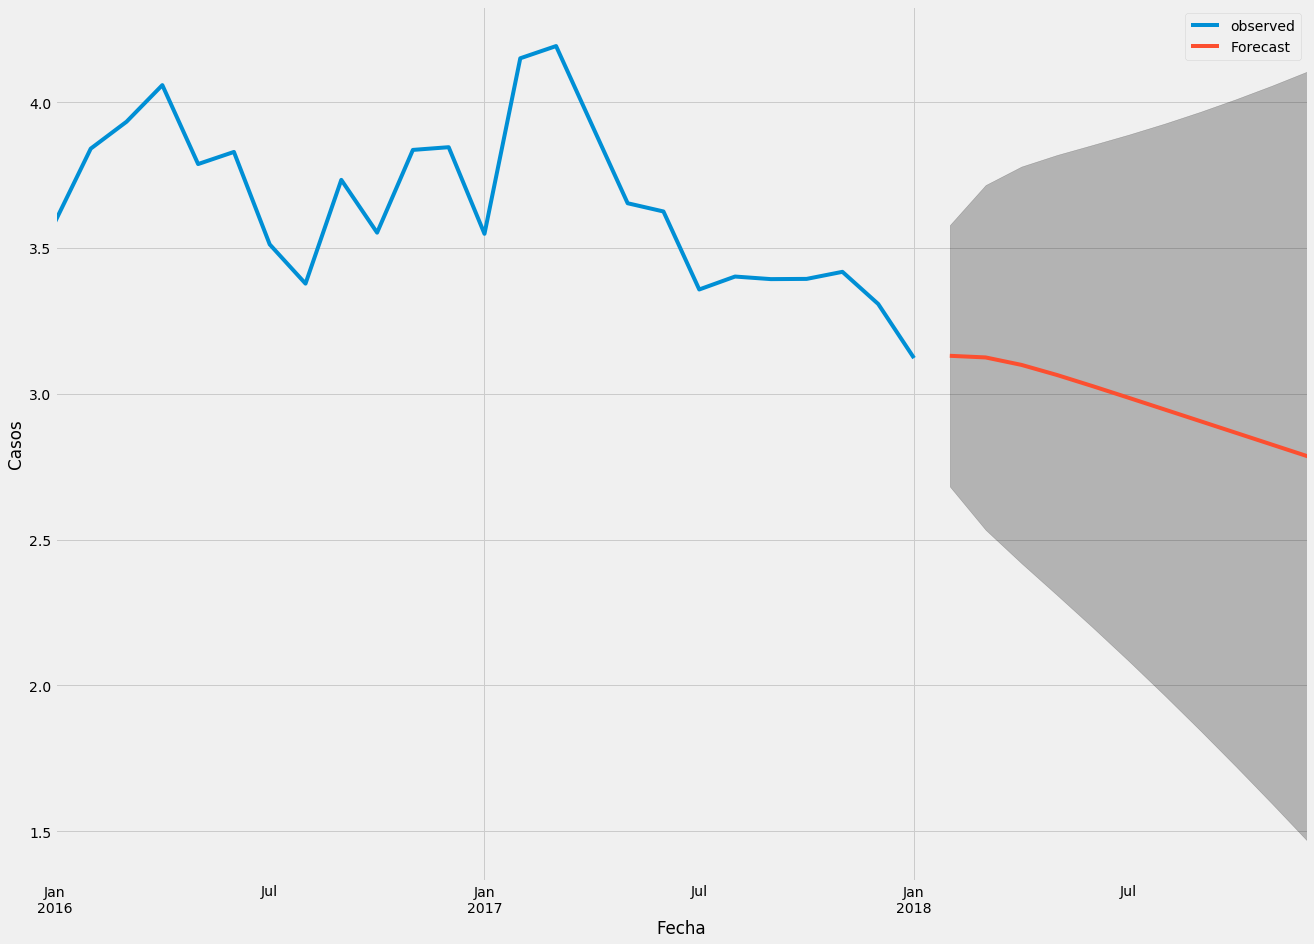

In [24]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')

plt.legend()
plt.show()

In [22]:
#from pandas import ExcelWriter

#writer = ExcelWriter('arima_m.xlsx')
#pred_uc.predicted_mean.to_excel(writer,'Sheet1')
#writer.save()

pred_uc.predicted_mean.head()
pred_uc.predicted_mean.tail()

2018-09-01    2.905921
2018-10-01    2.865759
2018-11-01    2.825586
2018-12-01    2.785410
2019-01-01    2.745233
Freq: MS, dtype: float64

In [91]:
from pandas import ExcelWriter


predict=pred_uc.predicted_mean


pd.DataFrame(predict).to_excel('report.xls', index=True)